# Creating a 4 layer CNN (Non-Pretrained) on Sad and Happy Emotion Data

## Installing necessary libraries (If not yet installed)

In [ ]:
# pip install keras tensorflow

## Creating a filepath to the train and test sets

In [3]:
train_dir = "/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/Weekly Class Activities/Week 6/Data/Emotion Dataset (Sad and Happy)/train"
test_dir = "/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/Weekly Class Activities/Week 6/Data/Emotion Dataset (Sad and Happy)/test"

In [4]:
import setuptools ## To bypass distutils issue
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [5]:
train_data = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    train_dir,
    target_size = (100,100),
    batch_size = 16
)
test_data = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    test_dir,
    target_size = (100,100),
    batch_size = 16
)

Found 1004 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = "relu")) #Creation of a layer
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

In [8]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

In [9]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,568 (256.12 KB)

 Trainable params: 65,568 (256.12 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#This step is the classifier step
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "softmax"))

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
h = model.fit(train_data,
          epochs = 10,
          batch_size = 16)
#pip install pillow to get PIL

Epoch 1/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1:03 1s/step - accuracy: 0.5625 - loss: 0.7665

/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5038 - loss: 0.7204
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5185 - loss: 0.6921
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5308 - loss: 0.6899
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5686 - loss: 0.6748
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6207 - loss: 0.6513
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6406 - loss: 0.6503
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7461 - loss: 0.5762
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.7800 - loss: 0.4915
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7741 - loss: 0.4686
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7989 - loss: 0.4277


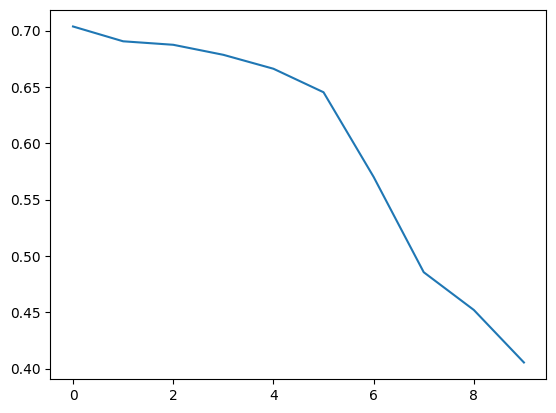

In [16]:
import matplotlib.pyplot as plt
plt.plot(h.history["loss"])

In [17]:
model.evaluate(test_data)

 3/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9375 - loss: 0.2975 

/Users/atherialdawn/Documents/Programming Stuff/BC3415 AI in Accounting & Finance/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8745 - loss: 0.3482


[0.3722127079963684, 0.8425531983375549]